In [ ]:
### This lab did not work correctly. I have checked all of my code and it is exactly as presented in the lab but the expected results are nowhere near what is shown in the lab printout. Whomever created this lab must have done something differently that they left out of this lab. ###

In [18]:
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Load the Data
from keras.datasets import cifar10

#training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [20]:
#get the shape of the array
print('x_train shape:', x_train.shape) #5000 rows of data, with 32x32 images each row, depth of image color is 3
print('y_train shape:', y_train.shape) #10000 rows and 1 column
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [21]:
#Print the first image of train dataset as an array
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

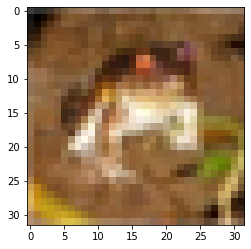

In [22]:
#Print the first image of train dataset as a picture
img = plt.imshow(x_train[0])


In [23]:
#get the first image label
print("The image label is:", y_train[0])


The image label is: [6]


In [24]:
#Label the classes
classifications = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [25]:
#get the first image label name
print('The image class is:', classifications[y_train[0][0]])


The image class is: frog


In [26]:
#Convert the labels into a set of 10 nums to input into neural network

y_train_new_label = to_categorical(y_train)
y_test_new_label = to_categorical(y_test)


In [27]:
#Print the new labels
print(y_train_new_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [28]:
#Print the new labels of the image above
print(y_train_new_label[0])


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [29]:
#Normalize the pixels into values between 0 and 1

x_train = x_train /255
x_test = x_test /255


In [30]:
#Check if the pixels are between 0 and 1 as expected
x_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [31]:
#Create models architecture

model = Sequential()

#add the first layer
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size= (2, 2)))

#add another convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#add a flattening layer
model.add(Flatten())

#add a layer with 100 neurons
model.add(Dense(1000, activation='relu'))

#add a drop out layer
model.add(Dropout(0.5))

#add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

#add another drop out layer
model.add(Dropout(0.5))

#add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

#add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))


In [32]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [33]:
#Train the model
hist = model.fit(x_train, y_train_new_label,
                 batch_size= 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 20s 125ms/step - loss: 1.7950 - accuracy: 0.3207 - val_loss: 1.4820 - val_accuracy: 0.4551
Epoch 2/10
157/157 [==============================] - 19s 124ms/step - loss: 1.4260 - accuracy: 0.4780 - val_loss: 1.3204 - val_accuracy: 0.5284
Epoch 3/10
157/157 [==============================] - 19s 119ms/step - loss: 1.2747 - accuracy: 0.5375 - val_loss: 1.2113 - val_accuracy: 0.5649
Epoch 4/10
157/157 [==============================] - 23s 145ms/step - loss: 1.1811 - accuracy: 0.5738 - val_loss: 1.1408 - val_accuracy: 0.5966
Epoch 5/10
157/157 [==============================] - 19s 119ms/step - loss: 1.0896 - accuracy: 0.6112 - val_loss: 1.1094 - val_accuracy: 0.6060
Epoch 6/10
157/157 [==============================] - 19s 118ms/step - loss: 1.0141 - accuracy: 0.6428 - val_loss: 0.9960 - val_accuracy: 0.6551
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.9435 - accuracy: 0.6670 - val_loss: 1.0514 - val_ac

In [34]:
#Evaluate the model using the test dataset
model.evaluate(x_test, y_test_new_label)[1]


313/313 [==============================] - 2s 6ms/step - loss: 0.9585 - accuracy: 0.6693


0.6693000197410583

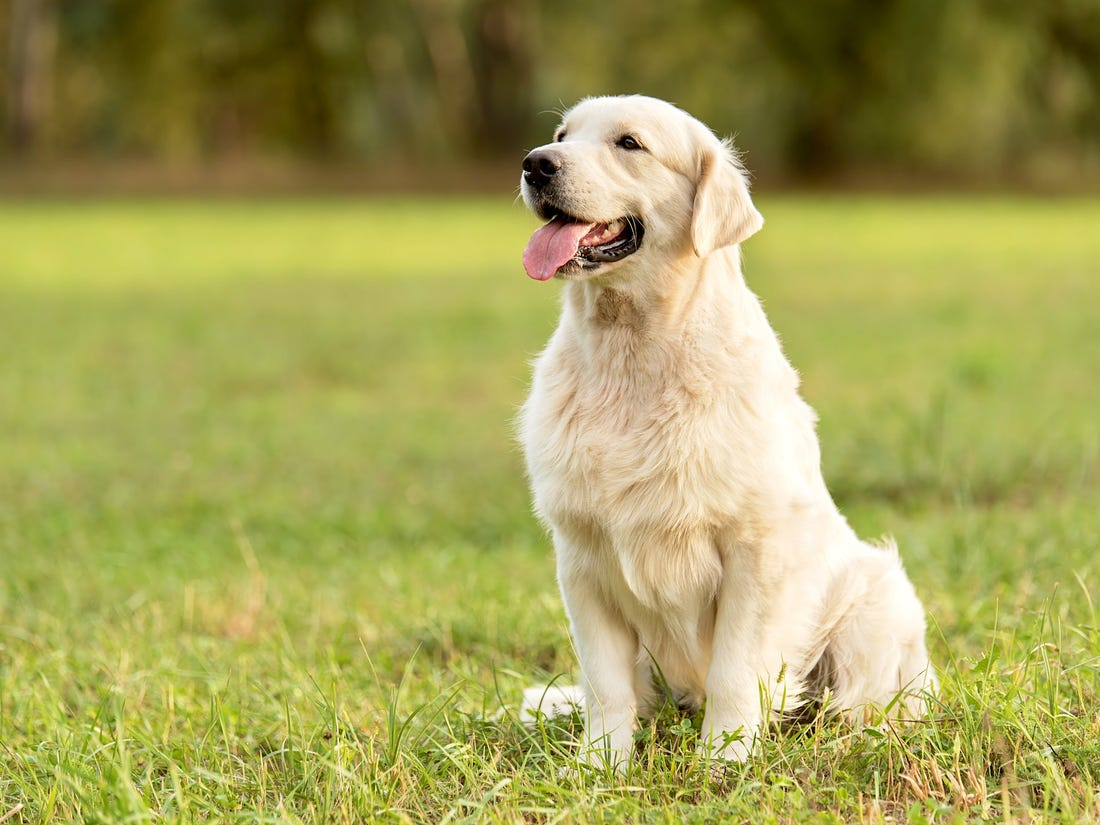

In [35]:
#Test the model with a real example

#show the image
from IPython.display import Image
Image(filename='dog_test.jpeg')

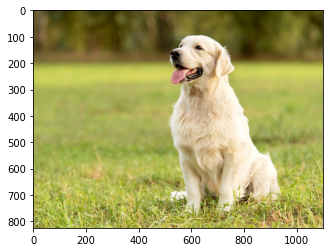

In [36]:
#show image using plt
test_img = plt.imread('dog_test.jpeg')
plt.imshow(test_img)

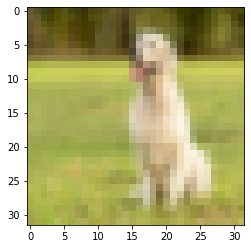

In [37]:
#resize the image to 32x32, depth 3

from skimage.transform import resize

resized_img = resize(test_img, (32, 32, 3))
plt.imshow(resized_img)

In [38]:
#Test if model can predict this is a dog

#get model prediction
predictions = model.predict(np.array([resized_img]))

#Show the predictions
predictions


array([[1.5929090e-03, 8.4895983e-05, 5.6073397e-01, 7.6167099e-02,
        1.2363966e-01, 1.3242945e-01, 8.0778264e-03, 9.6660443e-02,
        2.6279880e-04, 3.5087572e-04]], dtype=float32)

In [39]:
#highest value from results above means teh ones model thinks is the most accurate to the picture
#Let's sort the array to get the highest number

list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #each index represents a classification we have
x = predictions

for i in range(10):
    for j in range (10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#show sorted labels in descending order
print(list_index)

[2, 5, 4, 7, 3, 6, 0, 9, 8, 1]


In [40]:
#show the first 5 classifications

for i in range(5):
    print(classifications[list_index[i]], "-", predictions[0][list_index[i]] * 100, "%")


bird - 56.073397397994995 %
dog - 13.242945075035095 %
deer - 12.363965809345245 %
horse - 9.666044265031815 %
cat - 7.616709917783737 %
